## Simple Linear Regression

In [1]:
#Importing Needed packages
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl #PyLab is a procedural interface to the Matplotlib object-oriented plotting library. Matplotlib is the whole package; matplotlib.pyplot is a module in Matplotlib; and PyLab is a module that gets installed alongside Matplotlib.
import numpy as np

In [2]:
# Dataset source: https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
# FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 
# I donwloaded and saved data in my local computer.
# Download the dataset from this link: https://drive.google.com/file/d/1-g_08xw_bSzlI9kl-vPjlLx0YR2-ApiA/view?usp=sharing
#  import and read data
import sys
#sys.path[0] # current directory
filepath = sys.path[0] + '/FuelConsumptionCo2.csv'
df=pd.read_csv(filepath)
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
#Data Exploration
#Lets first have a descriptive exploration on our data.
# summarize the data
df.describe()
#df.describe(include='all')

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
# Extract some data from potential predictors and target CO2EMISSIONS
df_extract = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df_extract.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


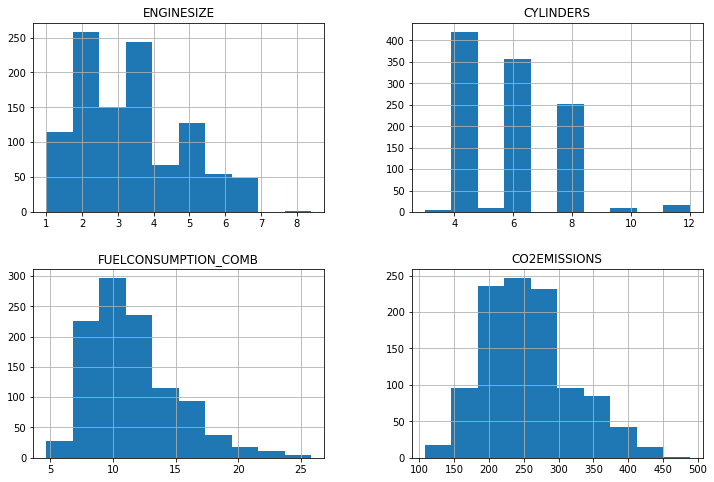

In [10]:
# Plotting of each features
df_extract.hist(figsize=(12,8))
plt.show()

The goal is to see the relationship between ENGINESIZE or CYLINDERS or FUELCONSUMPTION_COMB and CO2EMISSIONS
So, plotting each feature with the Emission, to see how linear is their relation

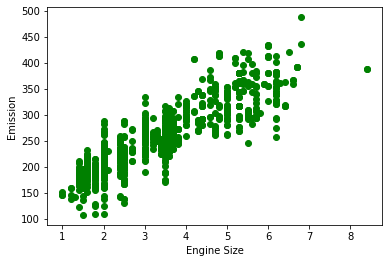

In [13]:
# ENGINESIZE vs the Emission
plt.scatter(x=df_extract['ENGINESIZE'], y=df_extract['CO2EMISSIONS'], color = 'green')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

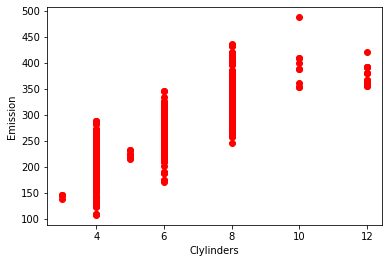

In [14]:
# CYLINDERS vs the emission
plt.scatter(x=df_extract['CYLINDERS'], y=df_extract['CO2EMISSIONS'], color='red')
plt.xlabel('Clylinders')
plt.ylabel('Emission')
plt.show()

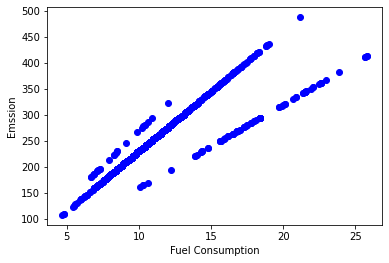

In [15]:
#FUELCONSUMPTION_COMB vs The Emission
plt.scatter(x=df_extract['FUELCONSUMPTION_COMB'], y=df_extract['CO2EMISSIONS'], color='blue')
plt.xlabel('Fuel Consumption')
plt.ylabel('Emssion')
plt.show()

### Creating train and test dataset: approach - Train/Test Split
Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. 

### Method 1
#We create a mask to select random rows using np.random.rand() function:

In [24]:
msk = np.random.rand(len(df))  < 0.8
train = df_extract[msk]
test = df_extract[~msk]

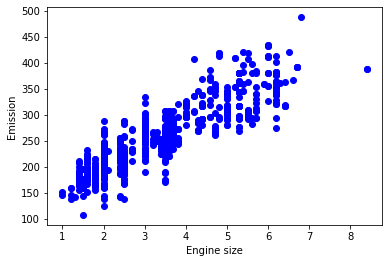

In [46]:
#Train data distribution, method 1
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [42]:
#Modeling - method 1
#Using sklearn package to model data.

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.24838431]]
Intercept:  [126.18920155]


Text(0, 0.5, 'Emission')

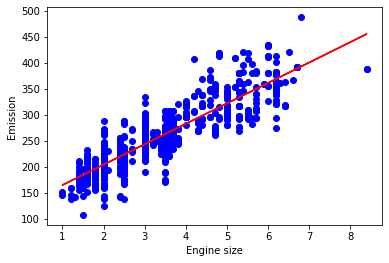

In [59]:
#Plot outputs
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Method 2: using train_test_split from sklearn

In [61]:
#Another way of splitting dataset into train and test sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_extract,test_size=0.2, random_state=0)
train.shape, test.shape
#more detailed spit into subset
#x_train, x_test, y_train, y_test = train_test_split(df_extract[['ENGINESIZE']],df_extract[['CO2EMISSIONS']],test_size=0.2, random_state=0)

((853, 4), (214, 4))

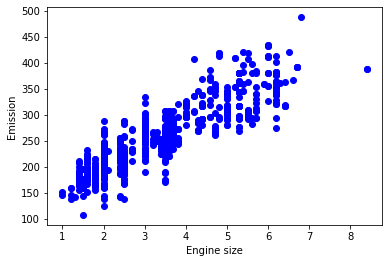

In [62]:
#Train data distribution, method 2
plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'], color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [64]:
# Modeling 
from sklearn import linear_model
lm = linear_model.LinearRegression()
x_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
lm.fit(x_train, y_train)
# The coefficients
print ('Coefficients: ', lm.coef_)
print ('Intercept: ',lm.intercept_)

Coefficients:  [[39.24838431]]
Intercept:  [126.18920155]


Text(0, 0.5, 'Emission')

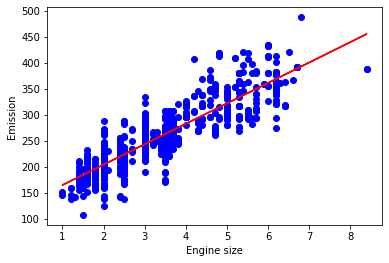

In [65]:
#Plot outputs
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'],  color='blue')
plt.plot(x_train, lm.coef_[0][0]*x_train + lm.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

- Mean absolute error (MAE): It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [29]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))

Mean absolute error: 23.54
Residual sum of squares (MSE): 1016.94
R2-score: 0.74
